In [3]:
import Pythonic_v2 as pf
import numpy as np
import yanat
import math
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import PySide2
import statsmodels.api as sm
from tqdm import tqdm
import scipy.io
import os
from visual_config import *
from matplotlib import font_manager
from scipy.spatial.distance import pdist, squareform
import pickle
for font in font_manager.findSystemFonts("/home/kenza/Desktop/Data-fTRACT/Atkinson-Hyperlegible-Font-Print-and-Web-2020-0514"):
    font_manager.fontManager.addfont(font)

set_visual_style()

/home/kenza/anaconda3/lib/python3.11/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# I - IMPORT

In [2]:
# Loading Lausanne consensus
matlabfile_path = '/home/kenza/Desktop/Data-fTRACT/Consensus_mat/Consensus_Connectomes.mat'

### i - load euclidian distance

# II - COMPUTE MODELS

### a - All connections

In [3]:
warnings.filterwarnings("ignore")
os.chdir('/home/kenza/Desktop/Data-fTRACT/d-ea46bcd6-d19b-479a-8d45-ecc486e3c8b1')
parcellations = ["33","60","125","250","500"]

Allco = []
for res in range(len(parcellations)):
    probability_path = "Lausanne2008-"+parcellations[res]+"/probability.txt"
    labels_path = "Lausanne2008-"+parcellations[res]+"/Lausanne2008-"+parcellations[res]+".txt"
    D = pf.compute_models(matlabfile_path,probability_path,labels_path,res)
    Allco.append(D)

In [14]:
def Load_Matrix_Names(HBP_Dataset_path):
    """
    Function that returns the paths of the HBP matrices for all resolution and to the label file associated 
    
    PARAMETERS:
    - HBP_Dataset_path (str): path containing Human Brain Projet matrices

    RETURN:
    - 2-D (list): contains the paths leading to the different matrix resolution and the labels associated
    """
    os.chdir(HBP_Dataset_path)
    ftract_path = []
    label_ftract_path = []
    parcellations = ["33","60","125","250","500"]
    for res in range(len(parcellations)):
        ftract_path.append("Lausanne2008-"+parcellations[res]+"/probability.txt") 
        label_ftract_path.append("Lausanne2008-"+parcellations[res]+"/Lausanne2008-"+parcellations[res]+".txt")
    return [ftract_path,label_ftract_path]
    

In [ ]:
def COMPUTE(HBP_Dataset_path,Lausanne_path):
    """
    Compute all the communicatiion models for all resolution, for all, direct and indirect connections.
    
    PARAMETERS:
    - HBP_Dataset_path, Lausanne_path (str): path of the HBP dataset and Lausanne consensus connectome file 

    RETURN:
    - MODELS (dic): a dictionnary containing matrices for all resolution & all models. To select a particular matrix follow this hierarchy:
        - 1st level of keys: 'ALL', 'DIRECT', 'INDIRECT': describes the type of connection
            - 2nd level correspond to the resolution
                - 3rd level correspond to the type of the model
    """
    MODELS={'ALL':[],'DIRECT':[],'INDIRECT':[]}
    ftract_path, label_ftract_path =Load_Matrix_Names(HBP_Dataset_path)
    for res in range(5):
        MODELS['ALL'].append(compute_models(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
        MODELS['DIRECT'].append(compute_models_direct_connections(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
        MODELS['INDIRECT'].append(compute_models_indirect_connections(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
    return MODELS

In [18]:
def COMPUTE(HBP_Dataset_path,Lausanne_path):
    MODELS={'ALL':[],'DIRECT':[],'INDIRECT':[]}
    ftract_path, label_ftract_path =Load_Matrix_Names(HBP_Dataset_path)
    for res in range(5):
        MODELS['ALL'].append(pf.compute_models(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
        MODELS['DIRECT'].append(pf.compute_models_direct_connections(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
        MODELS['INDIRECT'].append(pf.compute_models_indirect_connections(Lausanne_path,ftract_path[res],label_ftract_path[res],res))
    return MODELS

In [20]:
HBP_Dataset_path='/home/kenza/Desktop/Data-fTRACT/d-ea46bcd6-d19b-479a-8d45-ecc486e3c8b1'
Lausanne_path='/home/kenza/Desktop/Data-fTRACT/Consensus_mat/Consensus_Connectomes.mat'
ALLCOMMUNICATION_MODELS = COMPUTE(HBP_Dataset_path,Lausanne_path)

/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:196: LinAlgWarning: Ill-conditioned matrix (rcond=2.39905e-17): result may not be accurate.
  influence_matrix = solve(I - alpha * adjacency_matrix, I)
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:196: LinAlgWarning: Ill-conditioned matrix (rcond=2.39905e-17): result may not be accurate.
  influence_matrix = solve(I - alpha * adjacency_matrix, I)
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:196: LinAlgWarning: Ill-conditioned matrix (rcond=2.39905e-17): result may not be accurate.
  influence_matrix = solve(I - alpha * adjacency_matrix, I)
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:196: LinAlgWarning: Ill-conditioned matrix (rcond=5.91492e-18): result may not be accurate.
  influence_matrix = solve(I - alpha * adjacency_matrix, I)
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:196: LinAlgWarning: Ill-conditioned matrix (rcond=5.91492e-18): res

In [24]:
ALLCOMMUNICATION_MODELS['DIRECT'][0]

{'SC': [array([[0.        , 0.0664688 , 0.00401675, ..., 0.        , 0.        ,
          0.        ],
         [0.0664688 , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        , 0.02024909,
          0.0330868 ],
         [0.        , 0.        , 0.        , ..., 0.02024909, 0.        ,
          0.0075439 ],
         [0.        , 0.        , 0.        , ..., 0.0330868 , 0.0075439 ,
          0.        ]]),
  (0.6114660844490593, 1.1874759469428877e-123)],
 'FC': [array([[0.        , 0.36991771, 0.17229416, ..., 0.        , 0.        ,
          0.        ],
         [0.36991771, 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.  

In [13]:
Load_Matrix_Names('/home/kenza/Desktop/Data-fTRACT/d-ea46bcd6-d19b-479a-8d45-ecc486e3c8b1')[0][0]

'Lausanne2008-33/probability.txt'

In [4]:
modelkeys = list(Allco[0].keys())[:-1]
spearmanscore=np.zeros((5,6))
for res in range(len(parcellations)):
    m =0
    for model in modelkeys:
        spearmanscore[res,m] = Allco[res][model][1][0]
        m+=1
spearmanscore
df_spearman = pd.DataFrame(spearmanscore, columns=modelkeys, index=parcellations)
df_spearman

,SC,FC,ED,FL,LAM,CMY
33,0.611466,0.411863,-0.621907,-0.749366,0.560498,0.559661
60,0.599128,0.420007,-0.621530,-0.716207,0.597951,0.597778
125,0.588192,0.419320,-0.605432,-0.689611,0.561372,0.559437
250,0.373446,0.280262,-0.450065,-0.543405,0.415902,0.401145
500,0.238771,0.228908,-0.364569,-0.357390,0.312976,0.307243


### a - Indirect connections

In [5]:
Indirectco = []
for res in range(len(parcellations)):
    probability_path = "Lausanne2008-"+parcellations[res]+"/probability.txt"
    labels_path = "Lausanne2008-"+parcellations[res]+"/Lausanne2008-"+parcellations[res]+".txt"
    D = pf.compute_models_indirect_connections(matlabfile_path,probability_path,labels_path,res)
    Indirectco.append(D)

In [6]:
modelkeys_indirectco = list(Indirectco[0].keys())[:-1]
spearmanscore_indirectco = np.zeros((5,5))
for res in range(len(parcellations)):
    m =0
    for model in modelkeys_indirectco:
        spearmanscore_indirectco[res,m] = Indirectco[res][model][1][0]
        m+=1
spearmanscore_indirectco
df_spearman_indirectco = pd.DataFrame(spearmanscore_indirectco, columns = modelkeys_indirectco, index=parcellations)
df_spearman_indirectco

,FC,ED,FL,LAM,CMY
33,0.239493,-0.490338,NaN,0.380393,0.378762
60,0.261724,-0.489240,NaN,0.457755,0.457865
125,0.291117,-0.510647,NaN,0.465078,0.463851
250,0.197662,-0.392932,NaN,0.355838,0.337370
500,0.199547,-0.342150,NaN,0.288744,0.282711


### b - Direct connections

In [7]:
Directco = []
for res in range(len(parcellations)):
    probability_path = "Lausanne2008-"+parcellations[res]+"/probability.txt"
    labels_path = "Lausanne2008-"+parcellations[res]+"/Lausanne2008-"+parcellations[res]+".txt"
    D = pf.compute_models_direct_connections(matlabfile_path,probability_path,labels_path,res)
    Directco.append(D)

In [1102]:
modelkeys_directco = list(Directco[0].keys())[:-1]

spearmanscore_directco=np.zeros((5,7))
for res in range(len(parcellations)):
    m =0
    for model in modelkeys_directco:
        spearmanscore_directco[res,m] = Directco[res][model][1][0]
        m+=1
spearmanscore_directco
spearmanscore_directco[2,6]=rho_d_oiNORMandLINEAR
modelkeys_directco.append('OI')
df_spearman_directco = pd.DataFrame(spearmanscore_directco, columns=modelkeys_directco, index=parcellations)
df_spearman_directco

,SC,FC,ED,FL,LAM,CMY,OI
33,0.611466,0.526065,-0.659572,-0.749366,0.625109,0.622847,0.000000
60,0.599128,0.574866,-0.699763,-0.716207,0.637609,0.638068,0.000000
125,0.588192,0.609727,-0.714500,-0.689611,0.624296,0.625196,0.617431
250,0.373446,0.433840,-0.515576,-0.543405,0.397136,0.397830,0.000000
500,0.238771,0.244591,-0.320873,-0.357390,0.260311,0.255155,0.000000


In [1085]:
[rho_Allco_oiNORMandLINEAR,rho_d_oiNORMandLINEAR,rho_ind_oiNORMandLINEAR]

[0.5571872764468591, 0.617431310842284, 0.4654662819740733]

In [ ]:
pd.DataFrame(spearmanscore_directco, columns='OI', index=parcellations)

In [12]:
pf.calculate_spearmanr(Directco[2]['FL'][0],Directco[2]['ED'][0])

(1.0, 0.0)

# III - Plot

In [467]:
with open('/home/kenza/Desktop/Data-fTRACT/hopf_norm.pkl', 'rb') as file:
    hopf = pickle.load(file)

In [1294]:
AllcoSC = Allco[2]['SC'][0]
AllcoFC = Allco[2]['FC'][0]

AllcoCMY = Allco[2]['CMY'][0]
Allcoftract = Allco[2]['ftract'][0]
Allcoftract_SCmask = Allco[2]['ftract'][1]
Allcoftract_FLmask = pf.display_mask(AllcoFL,Allcoftract)[1]
AllcoED = Allco[2]['ED'][0]
AllcoFL = Allco[2]['FL'][0]
AllcoLAM = Allco[2]['LAM'][0]

rho_Allco_FC,pvalAllco_FC = pf.calculate_spearmanr(AllcoFC,Allcoftract)
rho_Allco_SC,pvalAllco_SC = pf.calculate_spearmanr(AllcoSC,Allcoftract_SCmask)
rho_Allco_CMY,pvalAllco_CMY = pf.calculate_spearmanr(AllcoCMY,Allcoftract)
rho_Allco_ED,pvalAllco_ED = pf.calculate_spearmanr(AllcoED,Allcoftract)
rho_Allco_LAM,pvalAllco_LAM = pf.calculate_spearmanr(AllcoLAM,Allcoftract)
rho_Allco_LAM,pvalAllco_LAM = pf.calculate_spearmanr(AllcoLAM,Allcoftract)
rho_Allco_FL,pvalAllco_FL = pf.calculate_spearmanr(AllcoFL,Allcoftract_FLmask)

vect_Allco_FC = pf.get_nonzero_flat_vector(AllcoFC)
vect_Allco_SC = pf.get_nonzero_flat_vector(AllcoSC)
vect_Allco_FL = pf.get_nonzero_flat_vector(AllcoFL)
vect_Allco_LAM = pf.get_nonzero_flat_vector(AllcoLAM)

vect_Allco_ftract_SCmask = pf.get_nonzero_flat_vector(Allcoftract_SCmask)
vect_Allco_ftract_FLmask = pf.get_nonzero_flat_vector(Allcoftract_FLmask)

vect_Allco_LAM = pf.get_nonzero_flat_vector(AllcoLAM)
vect_Allco_CMY = pf.get_nonzero_flat_vector(AllcoCMY)
vect_Allco_ED = pf.get_nonzero_flat_vector(AllcoED)
vect_Allco_FL = pf.get_nonzero_flat_vector(AllcoFL)
vect_Allco_ftract = pf.get_nonzero_flat_vector(Allcoftract)


In [1299]:
np.mean(st.spearmanr(AllcoCMY,Allcoftract)[1])

0.0633822053253285

In [639]:
data_binaire = np.where(Allco[2]['SC'][0] > 0, 1, 0)

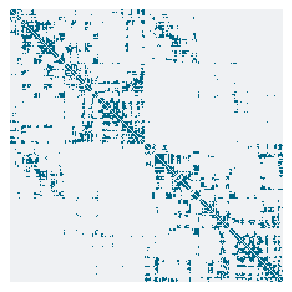

In [644]:
plt.figure(figsize=(9 * CM, 9 * CM))

SCcol = sns.color_palette('light:'+DEEP_BLUE, as_cmap=True)

sns.heatmap(data_binaire,square=True,xticklabels=False,
            cmap=SCcol,
            yticklabels=False,
            linewidths=0,
            rasterized=True,
            cbar=False,)
sns.despine(fig=fig, top=False, right=False, left=False, bottom=False)

#### HOPF

In [469]:
hopfAll,ftractall = pf.display_mask(hopf,Allcoftract)
rho_Allco_hopf,pval = pf.calculate_spearmanr(hopfAll,ftractall)
print("all",rho_Allco_hopf)
vect_model_hop = pf.get_nonzero_flat_vector(hopfAll)

hopfd,ftractdhopf = pf.display_mask(hopf,directftract)
rho_d_hopf,pval = pf.calculate_spearmanr(hopfd,ftractdhopf)
print("direct",rho_d_hopf)
vect_model_hopf_di = pf.get_nonzero_flat_vector(hopfd)

hopfind,ftractindhopf = pf.display_mask(hopf,indirectftract)
rho_ind_hopf,pval = pf.calculate_spearmanr(hopfind,ftractindhopf)
print("indirect",rho_ind_hopf)
vect_model_hopf_ind = pf.get_nonzero_flat_vector(hopfind)


all 0.5771330393034386
direct 0.6367895932993718
indirect 0.48037222979887956


#### OI - LINEAR

In [ ]:
oi_norm_125

In [1291]:
oiNORMandLINEARAll,ftractall = pf.display_mask(oi_norm_125,Allcoftract)
rho_Allco_oiNORMandLINEAR,pval_oiAll = pf.calculate_spearmanr(oiNORMandLINEARAll,ftractall)
print("all",rho_Allco_oiNORMandLINEAR)
vect_model_oiNORMandLINEAR = pf.get_nonzero_flat_vector(oiNORMandLINEARAll)

oiNORMandLINEARd,ftractdhopf = pf.display_mask(oi_norm_125,directftract)
rho_d_oiNORMandLINEAR,pval_oidir = pf.calculate_spearmanr(oiNORMandLINEARd,ftractdhopf)
print("direct",rho_d_oiNORMandLINEAR)
vect_model_oiNORMandLINEAR_di = pf.get_nonzero_flat_vector(oiNORMandLINEARd)

oiNORMandLINEARind,ftractindhopf = pf.display_mask(oi_norm_125,indirectftract)
rho_ind_oiNORMandLINEAR,pval_oiIndir = pf.calculate_spearmanr(oiNORMandLINEARind,ftractindhopf)
print("indirect",rho_ind_oiNORMandLINEAR)
vect_model_oiNORMandLINEAR_ind = pf.get_nonzero_flat_vector(oiNORMandLINEARind)


all 0.5571872764468591
direct 0.617431310842284
indirect 0.4654662819740733


In [1290]:
# Faire une fonction pour ca !!
directSC = Directco[2]['SC'][0]
directCMY = Directco[2]['CMY'][0]
directftract = Directco[2]['ftract'][0]
directED = Directco[2]['ED'][0]
directFL = Directco[2]['FL'][0]
directFC = Directco[2]['FC'][0]
directLAM = Directco[2]['LAM'][0]

indirectFC = Indirectco[2]['FC'][0]
indirectCMY = Indirectco[2]['CMY'][0]
indirectLAM = Indirectco[2]['LAM'][0]
indirectftract = Indirectco[2]['ftract'][0]
indirectED = Indirectco[2]['ED'][0]


rho_direct_SC,pvalSC_direct = pf.calculate_spearmanr(directSC,directftract)
rho_direct_CMY,pvalCMY_direct = pf.calculate_spearmanr(directCMY,directftract)
rho_direct_ED,pvalED_direct = pf.calculate_spearmanr(directED,directftract)
rho_direct_FL,pvalFL_direct = pf.calculate_spearmanr(directFL,directftract)
rho_direct_FC,pvalFC_direct = pf.calculate_spearmanr(directFC,directftract)
rho_direct_LAM,pvalLAM_direct = pf.calculate_spearmanr(directLAM,directftract)

vect_direct_SC = pf.get_nonzero_flat_vector(directSC)
vect_FC_direct = pf.get_nonzero_flat_vector(directFC)

vect_direct_cmy = pf.get_nonzero_flat_vector(directCMY)
vect_direct_ED = pf.get_nonzero_flat_vector(directED)
vect_direct_FL = pf.get_nonzero_flat_vector(directFL)
vect_direct_ftract = pf.get_nonzero_flat_vector(directftract)
vect_direct_LAM = pf.get_nonzero_flat_vector((directLAM))

rho_indirect_FC,pvalFC_indirect = pf.calculate_spearmanr(indirectFC,indirectftract)
rho_indirect_CMY,pvalCMY_indirect = pf.calculate_spearmanr(indirectCMY,indirectftract)
rho_indirect_ED,pvalED_indirect = pf.calculate_spearmanr(indirectED,indirectftract)
rho_indirect_LAM,pvalLAM_indirect = pf.calculate_spearmanr(indirectLAM,indirectftract)

vect_model_indirect_FC = pf.get_nonzero_flat_vector(indirectFC)
vect_model_indirect_cmy = pf.get_nonzero_flat_vector((indirectCMY))
vect_model_indirect_LAM = pf.get_nonzero_flat_vector((indirectLAM))
vect_model_indirect_ED = pf.get_nonzero_flat_vector((indirectED))

lognormindirectcmy = yanat.utils.log_normalize(vect_model_indirect_cmy)
logmimnmax_indirect_cmy = yanat.utils.minmax_normalize(lognormindirectcmy)
vect_ftract_indirect = pf.get_nonzero_flat_vector(indirectftract)

In [896]:
rhodirect=[rho_direct_SC,rho_direct_FL,rho_direct_FC,rho_direct_CMY,rho_direct_LAM,rho_d_oiNORMandLINEAR]
rhoindirect=[rho_indirect_FC,rho_indirect_CMY,rho_indirect_LAM,rho_ind_oiNORMandLINEAR]
rhoall=[rho_Allco_SC, rho_Allco_FL, rho_Allco_FC, rho_Allco_CMY, rho_Allco_LAM,rho_Allco_oiNORMandLINEAR]

In [808]:
len(vect_direct_cmy)==len(vect_direct_ftract)

True

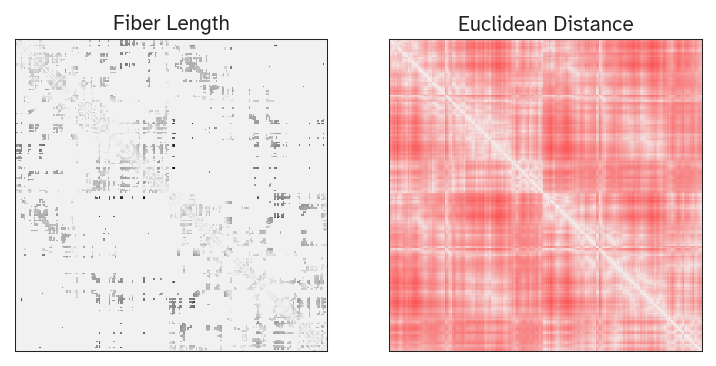

In [360]:
ED_color = sns.color_palette('light:#FA5252', as_cmap=True) 
fiber_color = sns.color_palette('light:black', as_cmap=True)
#white_red_mono 

coord = pf.read_coordinates(matlabfile_path, 2) 
ED = pf.calculate_euclidean_distances(coord)
fiber = pf.read_fiber_length(matlabfile_path, 2)

fig, axes = plt.subplot_mosaic(
    [
        ["A","B"]
    ],
    figsize=(15 * CM, 9 * CM),
    dpi=150,
)
sns.heatmap(fiber,ax=axes["A"],square=True,xticklabels=False,cmap=fiber_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )
sns.heatmap(ED,ax=axes["B"],square=True,xticklabels=False,cmap=ED_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )
axes["A"].title.set_text("Fiber Length")
axes["B"].title.set_text("Euclidean Distance")
sns.despine(fig=fig, top=False, right=False, left=False, bottom=False)

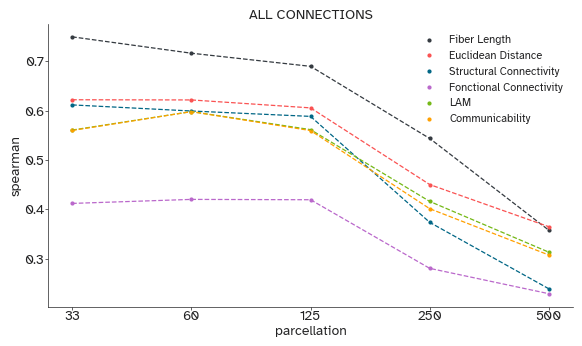

In [706]:
SC_color = DEEP_BLUE
FC_color = "#BA68CB"
CMY_color = "#FFA000"
LAM_color = "#74B816"
ED_color = "#FA5252"
FL_color= "#343A40"

fig, ax =plt.subplots(figsize=(15 * CM, 9 * CM))
   
# PERFORMANCE
#axes["A"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)
#axes["A"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)
ax.scatter(parcellations,abs(df_spearman['FL']),label="Fiber Length",color=FL_color, s=4)
ax.plot(parcellations, abs(df_spearman['FL']),linestyle='dashed', linewidth=0.9,color=FL_color)

ax.scatter(parcellations,abs(df_spearman['ED']),label="Euclidean Distance",color=ED_color, s=4)
ax.plot(parcellations, abs(df_spearman['ED']),linestyle='dashed', linewidth=0.9,color=ED_color)

ax.scatter(parcellations,df_spearman['SC'],label="Structural Connectivity",color=SC_color, s=4)
ax.plot(parcellations, df_spearman['SC'],linestyle='dashed', linewidth=0.9,color=SC_color)

ax.scatter(parcellations,df_spearman['FC'],label="Fonctional Connectivity",color=FC_color, s=4)
ax.plot(parcellations, df_spearman['FC'],linestyle='dashed', linewidth=0.9,color=FC_color)

ax.scatter(parcellations,df_spearman['LAM'],label="LAM",color=LAM_color, s=4)
ax.plot(parcellations, df_spearman['LAM'],linestyle='dashed', linewidth=0.9,color=LAM_color)

ax.scatter(parcellations,df_spearman['CMY'],label="Communicability",color=CMY_color, s=4)
ax.plot(parcellations, df_spearman['CMY'],linestyle='dashed', linewidth=0.9,color=CMY_color)


ax.legend(loc="upper right", frameon=False, fontsize=8)
ax.set_title("ALL CONNECTIONS")

ax.set_xlabel('parcellation')
ax.set_ylabel('spearman')


sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/Direct_res_spearman.png",dpi=600,bbox_inches='tight')

In [382]:
oi_direct = pf.display_mask(oi_norm_125,directftract)[0]
rho_direct_OI,pval = pf.calculate_spearmanr(oi_direct,directftract)
oi_direct_vect = pf.get_nonzero_flat_vector(oi_direct)

oi_indirect = pf.display_mask(oi_norm_125,indirectftract)[0]
rho_indirect_OI,pval = pf.calculate_spearmanr(oi_indirect,indirectftract)
oi_direct_vect = pf.get_nonzero_flat_vector(oi_direct)

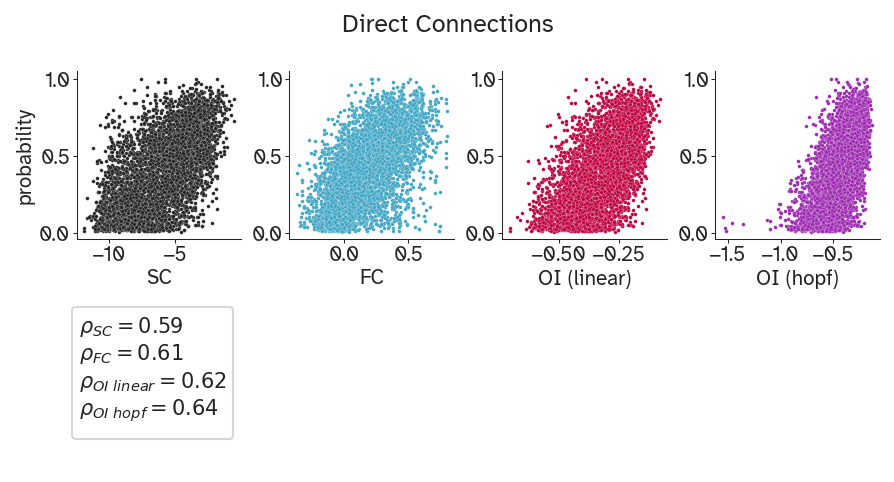

In [528]:
SC_color = HALF_BLACK
FC_color = BLUE
OI_color = RED
OI_hopf_color = "#9C27B0"
fig, axes = plt.subplot_mosaic(
    [
        ["B","D","C","c"],
        ["E", '.','.',"."],
    ],
    figsize=(15*CM,8*CM),
    dpi=150,
)

scatter1 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model),
                           y=vect_ftract,
                           ax=axes["B"],
                           color= SC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter2 = sns.scatterplot(x=(vect_FC_direct),
                           y=vect_ftract,
                           ax=axes["D"],
                           color= FC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter3 = sns.scatterplot(x=yanat.utils.log_normalize(oi_direct_vect),
                           y=vect_ftract,
                           ax=axes["C"],
                           color= OI_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter4 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model_hopf_di),
                           y=vect_ftract,
                           ax=axes["c"],
                           color= OI_hopf_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True) 

handles1, labels1 = scatter1.get_legend_handles_labels()
handles2, labels2 = scatter2.get_legend_handles_labels()
handles3, labels3 = scatter3.get_legend_handles_labels()
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3

axes["E"].legend(
    handles, labels,
    title=f"$\\rho_{{SC}} = {np.round(rho_direct_SC, 2)}$\n$\\rho_{{FC}} = {np.round(rho_direct_FC, 2)}$\n$\\rho_{{OI\ linear}} = {np.round(rho_direct_OI, 2)}$\n$\\rho_{{OI\ hopf}} = {np.round(rho_d_hopf, 2)}$")
axes["E"].axis('off')  
axes["B"].set_ylabel('probability')
axes["C"].set_xlabel('OI (linear)')
axes["c"].set_xlabel('OI (hopf)')

axes["B"].set_xlabel('SC')
axes["D"].set_xlabel('FC')

fig.suptitle("Direct Connections\n")
sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=0.5)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/direct_co.pdf",dpi=600,bbox_inches='tight')

In [554]:
def read_coordinates(path: str, res: int)-> np.array:
    """"
    Load as an np.array the 3D coordinates of the network from a matlab file
    """
    Lausanne = scipy.io.loadmat(path,simplify_cells=True, squeeze_me=True, chars_as_strings=True,)
    return Lausanne["LauConsensus"]["Matrices"][res][3]

In [557]:
coordinates = read_coordinates(matlabfile_path,2)
connectivity = AllcoSC

In [578]:
from typing import Union, Optional, Tuple, Callable
def brain_plotter(
 data: np.ndarray,
    coordinates: np.ndarray,
    axis: plt.Axes,
    view,
    size: int = 20,
    cmap: any = "viridis",
    scatter_kwargs=Optional[None],
) -> plt.Axes:
    """plots the 3D scatter plot of the brain. It's a simple function that takes the data, the coordinates, and the axis and plots the brain.
    It's a modified version the netneurotools python package but you can give it the axis to plot in. See here:
    https://netneurotools.readthedocs.io/en/latest/

    Args:
        data (np.ndarray): the values that need to be mapped to the nodes. Shape is (N,)
        coordinates (np.ndarray): 3D coordinates fo each node. Shape is (N, 3)
        axis (plt.Axes): Which axis to plot in. This means you have to already have a figure and an axis to plot in.
        view (Tuple[int, int], optional): Which view to look at. Defaults to (90, 180).
        size (int, optional): Size of the nodes. Defaults to 20.
        cmap (any, optional): Color map. Defaults to "viridis" which I don't like but you do you.
        scatter_kwargs (_type_, optional): kwargs for the dots. Defaults to Optional[None].

    Returns:
        plt.Axes: matplotlib axis with the brain plotted.
    """
    scatter_kwargs = scatter_kwargs if scatter_kwargs else {}

    axis.scatter(
        coordinates[:, 0],
        coordinates[:, 1],
        coordinates[:, 2],
        c=data,
        cmap=cmap,
        s=size,
        **scatter_kwargs,
    )
    axis.view_init(*view)
    axis.axis("off")
    scaling = np.array([axis.get_xlim(), axis.get_ylim(), axis.get_zlim()])
    axis.set_box_aspect(tuple(scaling[:, 1] / 1.2 - scaling[:, 0]))
    return axis
sagittal = (0, 180)
axial = (90, 180) # these are actually wrong but they do the job so I'm not changing them!
coronal = (0, 90)
bottom = (-90, 0)
size = 80
scatter_kw_network = dict(alpha=1, linewidths=0, edgecolors=HALF_BLACK)

TypeError: unhashable type: 'list'

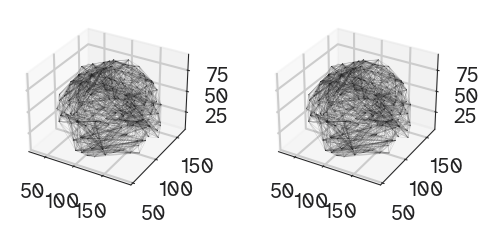

In [747]:
fig, axes = plt.subplot_mosaic(
    [["A","C"]
    ], figsize= (10 * CM,4 * CM), subplot_kw=dict(projection="3d"), dpi=150
)


for i in range(connectivity.shape[0]):
    for j in range(i, connectivity.shape[1]):
        if connectivity[i, j] != 0:
            axes["A"].plot(
                [coordinates[i, 0], coordinates[j, 0]],
                [coordinates[i, 1], coordinates[j, 1]],
                [coordinates[i, 2], coordinates[j, 2]],
                c=HALF_BLACK,
                alpha=0.2 + connectivity[i, j],
                linewidth=0.2,
            )
           
            axes["C"].plot(
                [coordinates[i, 0], coordinates[j, 0]],
                [coordinates[i, 1], coordinates[j, 1]],
                [coordinates[i, 2], coordinates[j, 2]],
                c=HALF_BLACK,
                alpha=0.2 + connectivity[i, j],
                linewidth=0.2,
            )

brain_plotter(
    np.array(coordinates[:, 0]),
    coordinates,
    axes["A"],
    view=sagittal,
    size=3,
    cmap=SCcol,
    scatter_kwargs=scatter_kw_network,
)

brain_plotter(
    np.flip(np.array(coordinates[:, 1])),
    coordinates,
    axes["C"],
    view=(0, 90) ,
    size=3,
    cmap=SCcol,
    scatter_kwargs=scatter_kw_network,
)

fig.tight_layout(pad=0.005)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/brains.pdf",dpi=600,bbox_inches='tight')

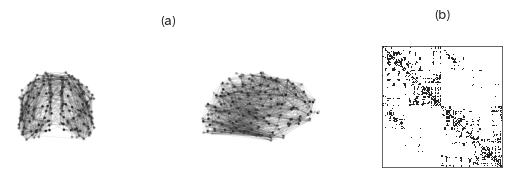

In [745]:
import matplotlib.image as mpimg
image = mpimg.imread('/home/kenza/Desktop/Data-fTRACT/figures/2brainsv2.png')  # Remplacez 'your_image.png' par le chemin de votre image
SCcol = sns.color_palette('light:'+HALF_BLACK, as_cmap=True)
SCcol = white_to_reds = [WHITE, GRAY, HALF_BLACK]
# Générer des données pour le plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Créer des sous-figures
fig, axes = plt.subplots(1, 2, figsize=(15*CM,4*CM))

# Afficher l'image dans la première sous-figure
axes[0].imshow(image)
axes[0].axis('off')  # Cacher les axes
axes[0].set_title('(a)',pad=20)# Afficher le plot dans la deuxième sous-figure

sns.heatmap(data_binaire,
            square=True,xticklabels=False,
            cmap=SCcol,
            ax= axes[1],
            yticklabels=False,
            linewidths=0,
            rasterized=True,
            cbar=False,)
axes[1].set_title('(b)',pad=20)
sns.despine(fig=fig, top=False, right=False, left=False, bottom=False)
# Afficher la figure combinée
plt.tight_layout(pad=0.005)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/BRAINS.pdf",dpi=600,bbox_inches='tight')
plt.show()

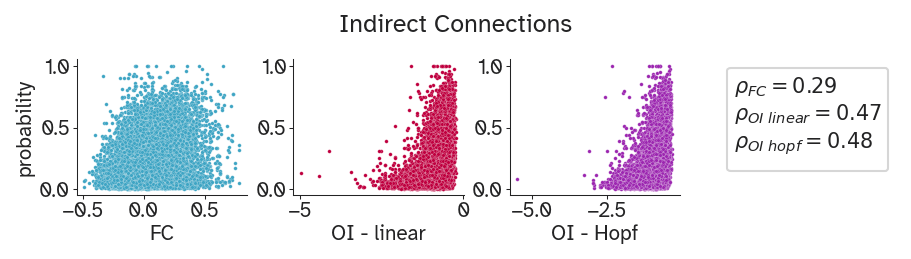

In [529]:
fig, axes = plt.subplot_mosaic(
    [
        ["D","C","c","E"],
    ],
    figsize=(15*CM,4*CM),
    dpi=150,
)
scatter1 = sns.scatterplot(x=(vect_model_indirect_FC),
                           y=vect_ftract_indirect,
                           ax=axes["D"],
                           color= FC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter2 = sns.scatterplot(x=yanat.utils.log_normalize(oi_indirect_vect),
                           y=vect_ftract_indirect,
                           ax=axes["C"],
                           color= OI_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)
scatter4 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model_hopf_ind),
                           y=vect_ftract_indirect,
                           ax=axes["c"],
                           color= OI_hopf_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True) 


handles1, labels1 = scatter1.get_legend_handles_labels()
handles2, labels2 = scatter2.get_legend_handles_labels()

# Combiner les légendes des deux scatter plots
handles = handles1 + handles2
labels = labels1 + labels2
axes["E"].legend(
    handles, labels,
    title=f"$\\rho_{{FC}} = {np.round(rho_indirect_FC, 2)}$\n$\\rho_{{OI\ linear}} = {np.round(rho_indirect_OI, 2)}$\n$\\rho_{{OI\ hopf}} = {np.round(rho_ind_hopf, 2)}$")
axes["E"].axis('off')  # Désactiver les axes pour le subplot de légende
axes["D"].set_ylabel('probability')
axes["C"].set_xlabel('OI - linear')
axes["D"].set_xlabel('FC')
axes["c"].set_xlabel('OI - Hopf')

fig.suptitle("Indirect Connections\n")
sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=0.1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/indirect_co.pdf",dpi=600,bbox_inches='tight')

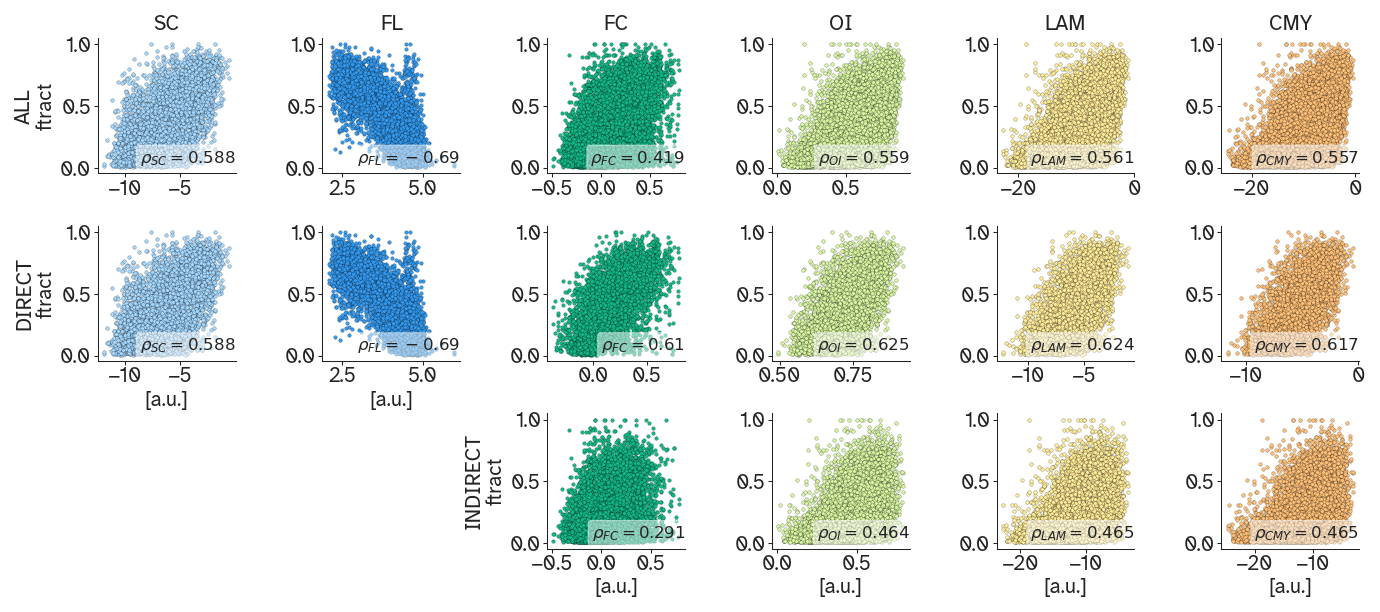

In [1287]:
sccol = '#A5D8FF'
flcol = '#339AF0'
fccol = '#12B886'
cmycol = '#FFC078'
lamcol = '#FFEC99'
oicol = '#D8F5A2'


toutes = ["A","B","C","F","E","D"]
directes = ["AA","BB","CC",'FF',"EE","DD"]
indirectes = ["CCC","FFF","EEE","DDD"]

fig, axes = plt.subplot_mosaic(
    [
    ["A","B","C","F","E","D"],
    ["AA","BB","CC",'FF',"EE","DD"],
    [".",".","CCC","FFF","EEE","DDD"]
    ],
    figsize=(23*CM,10*CM),
    dpi=150,
)
#ALL
scatter1all = sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_SC),
                           y=vect_Allco_ftract_SCmask,
                           ax=axes["A"],
                           s=3,
                        color=sccol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter2all = sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_FL),
                           y=vect_Allco_ftract_FLmask,
                           ax=axes["B"],
                           s=3,
                              color=flcol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter3all = sns.scatterplot(x=(vect_Allco_FC),
                           y=vect_Allco_ftract,
                           ax=axes["C"],
                           s=3,
                              color=fccol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter4all = sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_CMY),
                           y=vect_Allco_ftract,
                           ax=axes["D"],
                           s=3,
                              color=cmycol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True) 

scatter5all = sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_LAM),
                           y=vect_Allco_ftract,
                           ax=axes["E"],
                           s=3,
                              color=lamcol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True) 

scatter6all = sns.scatterplot(x=(vect_model_oiNORMandLINEAR),
                           y=vect_Allco_ftract,
                           ax=axes["F"],
                           s=3,
                              color=oicol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)


# DIRECT
scatter1direct = sns.scatterplot(x=yanat.utils.log_normalize(vect_direct_SC),
                           y=vect_direct_ftract,
                           ax=axes["AA"],
                           s=3,
                                 color=sccol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter2direct = sns.scatterplot(x=yanat.utils.log_normalize(vect_direct_FL),
                           y=vect_direct_ftract,
                           ax=axes["BB"],
                           s=3,
                                 color=flcol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter3direct = sns.scatterplot(x=(vect_FC_direct),
                           y=vect_direct_ftract,
                           ax=axes["CC"],
                           s=3,
                                 color=fccol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)

scatter4direct = sns.scatterplot(x=yanat.utils.log_normalize(vect_direct_cmy),
                           y=vect_direct_ftract,
                           ax=axes["DD"],
                           s=3,
                                 color=cmycol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True) 

scatter5direct = sns.scatterplot(x=yanat.utils.log_normalize(vect_direct_LAM),
                           y=vect_direct_ftract,
                           ax=axes["EE"],
                           s=3,
                                 color=lamcol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True) 

scatter6direct = sns.scatterplot(x=(vect_model_oiNORMandLINEAR_di),
                           y=vect_direct_ftract,
                           ax=axes["FF"],
                           s=3,
                                 color=oicol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)


# INDIRECT
scatter1 = sns.scatterplot(x=(vect_model_indirect_FC),
                           y=vect_ftract_indirect,
                           ax=axes["CCC"],
                           s=3,
                           color=fccol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)
scatter2 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model_indirect_cmy),
                           y=vect_ftract_indirect,
                           ax=axes["DDD"],
                           s=3,
                           color=cmycol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)
scatter3 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model_indirect_LAM),
                           y=vect_ftract_indirect,
                           ax=axes["EEE"],
                           s=3,
                           color=lamcol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)
scatter4 = sns.scatterplot(x=(vect_model_oiNORMandLINEAR_ind),
                           y=vect_ftract_indirect,
                           ax=axes["FFF"],
                           s=3,
                           color=oicol,
                           linewidth=0.09,
                           edgecolor='black',
                           rasterized=True)
# LABELLING
#Pval
labeldirectall=["SC","FL","FC","OI","LAM","CMY"]
labelindirect=["FC","OI","LAM","CMY"]
for i in range(len(rhodirect)):
    l = labeldirectall[i]
    axes[directes[i]].annotate(
    f"$\\rho_{{{l}}} = {np.round(rhodirect[i], 3)}$", xy=(1, 0.08), fontsize=8,
    xycoords="axes fraction", 
    bbox=dict(boxstyle='round,pad=0.2', edgecolor='white', facecolor='white',alpha=0.5,linewidth=0.5 ),
    ha='right')
    axes[toutes[i]].annotate(
    f"$\\rho_{{{l}}} = {np.round(rhoall[i], 3)}$", xy=(1, 0.08), fontsize=8,
    xycoords="axes fraction", 
    bbox=dict(boxstyle='round,pad=0.2', edgecolor='white', facecolor='white',alpha=0.5,linewidth=0.5 ),
    ha='right')
    
for i in range(len(indirectes)):
    l = labelindirect[i]
    axes[indirectes[i]].annotate(
    f"$\\rho_{{{l}}} = {np.round(rhoindirect[i], 3)}$", xy=(1, 0.08), fontsize=8,
    xycoords="axes fraction", 
    bbox=dict(boxstyle='round,pad=0.2', edgecolor='white', facecolor='white',alpha=0.5,linewidth=0.5 ),
    ha='right')


# AXES
axes["A"].set_ylabel('ALL\nftract')
axes["A"].set_title('SC')
axes["B"].set_title('FL')
axes["C"].set_title('FC')
axes["D"].set_title('CMY')
axes["E"].set_title('LAM')
axes["F"].set_title('OI')
axes["AA"].set_xlabel('[a.u.]')
axes["BB"].set_xlabel('[a.u.]')
axes["DDD"].set_xlabel('[a.u.]')
axes["CCC"].set_xlabel('[a.u.]')
axes["EEE"].set_xlabel('[a.u.]')
axes["FFF"].set_xlabel('[a.u.]')

axes["AA"].set_ylabel('DIRECT\nftract')
axes["CCC"].set_ylabel('INDIRECT\nftract')

fig.tight_layout(pad=0.2)
sns.despine(fig=fig, trim=False)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/multiplot_spearman.pdf",dpi=600,bbox_inches='tight')


<Figure size 531.496x295.276 with 0 Axes>

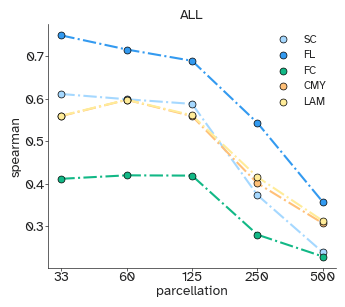

In [1142]:
plt.figure(figsize=(9 * CM, 5 * CM), dpi=150)

SC_color = '#A5D8FF'
FL_color = '#339AF0'
FC_color = '#12B886'
OI_color = '#FFC078'
LAM_color = '#FFEC99'
CMY_color = '#FFC078'


oicol = '#A9E34B'

fig, ax =plt.subplots(figsize=(9 * CM, 8 * CM))
   
modes=['SC','FL','FC','CMY','LAM']
line = ['dashdot','-.',':','dotted','solid']
line = ['dashdot','dashdot','dashdot','dashdot','dashdot']

couleursduplot = [SC_color,FL_color,FC_color,CMY_color,LAM_color]
for i in range(len(modes)):

    ax.scatter(parcellations,
           abs(df_spearman[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
        zorder=2)

    ax.plot(parcellations, 
        abs(df_spearman[modes[i]]),
        linestyle=line[i], 
        linewidth=1.5,
        color=couleursduplot[i],zorder=1)

ax.legend(loc="upper right", frameon=False, fontsize=8)
ax.set_title("ALL")

ax.set_xlabel('parcellation')
ax.set_ylabel('spearman')


sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/All_res_spearman.png",dpi=600,bbox_inches='tight')
plt.show();

<Figure size 531.496x295.276 with 0 Axes>

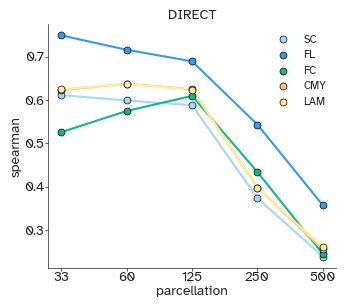

In [1028]:
plt.figure(figsize=(9 * CM, 5 * CM), dpi=150)

SC_color = '#A5D8FF'
FL_color = '#339AF0'
FC_color = '#12B886'
OI_color = '#FFC078'
LAM_color = '#FFEC99'
CMY_color = '#FFC078'


oicol = '#D8F5A2'

fig, ax =plt.subplots(figsize=(9 * CM, 8 * CM))
   
modes=['SC','FL','FC','CMY','LAM']
line = ['dashdot','-.',':','dotted','solid']
line = ['solid','solid','solid','solid','solid']

couleursduplot = [SC_color,FL_color,FC_color,CMY_color,LAM_color]
for i in range(len(modes)):

    ax.scatter(parcellations,
           abs(df_spearman_directco[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
        zorder=2)

    ax.plot(parcellations, 
        abs(df_spearman_directco[modes[i]]),
        linestyle=line[i], 
        linewidth=1.5,
        color=couleursduplot[i],zorder=1)
    
ax.legend(loc="upper right", frameon=False, fontsize=8)
ax.set_title("DIRECT")

ax.set_xlabel('parcellation')
ax.set_ylabel('spearman')


sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/Direct_res_spearman.png",dpi=600,bbox_inches='tight')
plt.show();

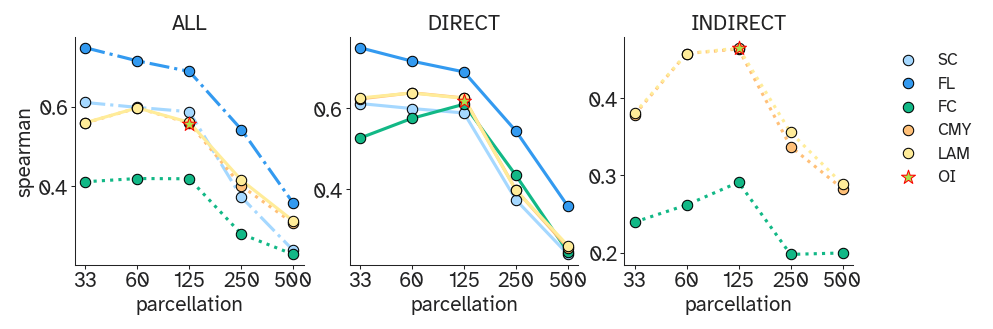

In [1144]:
fig, axes = plt.subplot_mosaic(
    [
    ["A","B","C"]
    ],
    figsize=(17*CM,5*CM),
    dpi=150,
)
SC_color = '#A5D8FF'
FL_color = '#339AF0'
FC_color = '#12B886'
OI_color = '#FFC078'
LAM_color = '#FFEC99'
CMY_color = '#FFC078'


oicol = '#A9E34B'

   
modes=['SC','FL','FC','CMY','LAM']
line = ['dashdot','-.',':','dotted','solid']
linedirect = ['solid','solid','solid','solid','solid']

couleursduplot = [SC_color,FL_color,FC_color,CMY_color,LAM_color]
for i in range(len(modes)):
    axes['B'].scatter(parcellations,
           abs(df_spearman_directco[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
               zorder=2)
    axes['B'].plot(parcellations,
        abs(df_spearman_directco[modes[i]]),
        linestyle=linedirect[i], 
        linewidth=1.5,
        color=couleursduplot[i],
            zorder=1)
    axes['A'].scatter(parcellations,
           abs(df_spearman[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
        zorder=2)
    axes['A'].plot(parcellations, 
        abs(df_spearman[modes[i]]),
        linestyle=line[i], 
        linewidth=1.5,
        color=couleursduplot[i],zorder=1)

modes=['FC','CMY','LAM']
line = ['dotted','dotted','dotted','dotted','dotted']
couleursduplot = [FC_color,CMY_color,LAM_color]

for i in range(len(modes)):
    axes['C'].scatter(parcellations,
           abs(df_spearman_indirectco[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
        zorder=2)

    axes['C'].plot(parcellations, 
        abs(df_spearman_indirectco[modes[i]]),
        linestyle=line[i], 
        linewidth=1.5,
        color=couleursduplot[i],zorder=1)

axes['A'].scatter(parcellations[2],rho_Allco_oiNORMandLINEAR,label='OI',edgecolor='red', color=oicol,linewidth=0.5,marker='*',s=50,zorder=3)
axes['B'].scatter(parcellations[2],rho_d_oiNORMandLINEAR,label='OI',edgecolor='red', color=oicol,linewidth=0.5,marker='*',s=50,zorder=3)
axes['C'].scatter(parcellations[2],rho_ind_oiNORMandLINEAR,label='OI',edgecolor='red', color=oicol,linewidth=0.5,marker='*',s=50,zorder=3)

axes['C'].set_title("INDIRECT")
axes['B'].set_title("DIRECT")
axes['A'].set_title("ALL")

axes['A'].set_xlabel('parcellation')
axes['B'].set_xlabel('parcellation')
axes['C'].set_xlabel('parcellation')

axes['A'].set_ylabel('spearman')
axes['A'].legend(loc="upper left", frameon=False, fontsize=8,bbox_to_anchor=(3.5, 1))

sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=0.5)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/res_spearman.png",dpi=600,bbox_inches='tight')
plt.show();

In [1119]:
parcellations[2]

'125'

In [1107]:
df_spearman_directco['OI']

33     0.000000
60     0.000000
125    0.617431
250    0.000000
500    0.000000
Name: OI, dtype: float64

In [1081]:
df_spearman_indirectco[modes[i]]

33     0.380393
60     0.457755
125    0.465078
250    0.355838
500    0.288744
Name: LAM, dtype: float64

<Figure size 531.496x295.276 with 0 Axes>

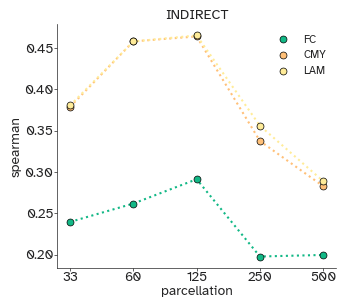

In [1031]:
plt.figure(figsize=(9 * CM, 5 * CM), dpi=150)

SC_color = '#A5D8FF'
FL_color = '#339AF0'
FC_color = '#12B886'
OI_color = '#FFC078'
LAM_color = '#FFEC99'
CMY_color = '#FFC078'


oicol = '#D8F5A2'

fig, ax =plt.subplots(figsize=(9 * CM, 8 * CM))
   
modes=['FC','CMY','LAM']

line = ['dotted','dotted','dotted','dotted','dotted']

couleursduplot = [FC_color,CMY_color,LAM_color]
for i in range(len(modes)):

    ax.scatter(parcellations,
           abs(df_spearman_indirectco[modes[i]]),
           label=modes[i],
           color=couleursduplot[i],
           linewidth=0.5,
           edgecolor='black',
           s=25,
        zorder=2)

    ax.plot(parcellations, 
        abs(df_spearman_indirectco[modes[i]]),
        linestyle=line[i], 
        linewidth=1.5,
        color=couleursduplot[i],zorder=1)

ax.legend(loc="upper right", frameon=False, fontsize=8)
ax.set_title("INDIRECT")

ax.set_xlabel('parcellation')
ax.set_ylabel('spearman')


sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/Inirect_res_spearman.png",dpi=600,bbox_inches='tight')
plt.show();

In [938]:
SC_219=yanat.utils.spectral_normalization(1,pf.read_structural_connectivity(matlabfile_path,2))
P_219=full_ftract[2]

max Rho 0.56


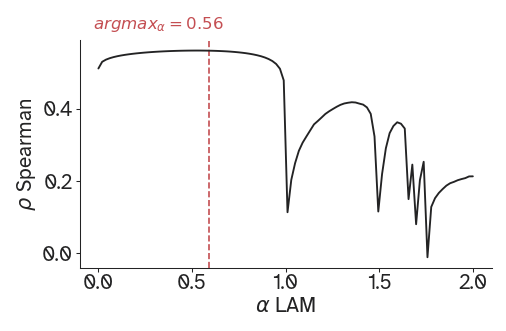

In [982]:
plt.figure(figsize=(9 * CM, 5 * CM), dpi=150)

a = np.linspace(0.0001,2,100)
SARmatParam = []
for alpha in range(len(a)):
    modeled = yanat.core.lam(SC_219,a[alpha])
    ProbLam,LAM= pf.display_mask(P_219,modeled)
    vLAM = LAM.flatten()
    vProb_lam = ProbLam.flatten()
    vLAM = vLAM[vLAM!= 0]
    vProb_lam = vProb_lam[vProb_lam!= 0]
    RHO = st.spearmanr(vLAM,vProb_lam)[0]
    SARmatParam.append(RHO)
max_lam_rho = np.round(np.max(SARmatParam), 2)
print("max Rho",max_lam_rho)


ax = plt.axes()
#result = f"$\\argmax_{{\\alpha}} = {max_lam_rho}$"
#f"$\\alpha_ = {max_lam_rho}$"
ax.annotate(f"$argmax_{{\\alpha}} = {max_lam_rho}$", xy=(0.35, 1.05), fontsize=8,color='r',
    xycoords="axes fraction", 
    bbox=dict(boxstyle='round,pad=0.2', edgecolor='white', facecolor='white',alpha=0.5,linewidth=0.5 ),
    ha='right')
plt.axvline(x=0.59, color='r', linestyle='--', linewidth=0.8)
plt.plot(a,SARmatParam,color=HALF_BLACK,linewidth=0.9)
plt.ylabel(r'$\rho$ Spearman')
plt.xlabel(r'$\alpha$ LAM')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/argmax_LAM.pdf",dpi=600,bbox_inches='tight')
plt.show()


In [ ]:
SC_color = HALF_BLACK
FC_color = BLUE
OI_color = RED

fig, axes = plt.subplot_mosaic(
    [
        ["B","D","C","X","E"],
        [".","A","G","Y","F"],
    ],
    figsize=(20*CM,6*CM),
    dpi=150,
)

scatter1 = sns.scatterplot(x=yanat.utils.log_normalize(vect_model),
                           y=vect_ftract,
                           ax=axes["B"],
                           color= SC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter2 = sns.scatterplot(x=(vect_FC_direct),
                           y=vect_ftract,
                           ax=axes["D"],
                           color= FC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter3 = sns.scatterplot(x=(oi_direct_vect),
                           y=vect_ftract,
                           ax=axes["C"],
                           color= OI_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)


handles1, labels1 = scatter1.get_legend_handles_labels()
handles2, labels2 = scatter2.get_legend_handles_labels()
handles3, labels3 = scatter3.get_legend_handles_labels()
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3

axes["E"].legend(
    handles, labels,
    title=f"$\\rho_{{SC}} = {np.round(rho_direct_SC, 2)}$\n$\\rho_{{FC}} = {np.round(rho_direct_FC, 2)}$\n$\\rho_{{OI\ linear}} = {np.round(rho_direct_OI, 2)}$\n$\\rho_{{OI\ hopf}} = {np.round(rho_d_hopf, 2)}$")
axes["E"].axis('off')  

scatter4 = sns.scatterplot(x=(vect_model_indirect_FC),
                           y=vect_ftract_indirect,
                           ax=axes["A"],
                           color= FC_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter5 = sns.scatterplot(x=(oi_indirect_vect),
                           y=vect_ftract_indirect,
                           ax=axes["G"],
                           color= OI_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

scatter6 = sns.scatterplot(x=(vect_model_hopf_ind),
                           y=vect_ftract_indirect,
                           ax=axes["Y"],
                           color= OI_hopf_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)
scatter7 = sns.scatterplot(x=(vect_model_hopf_di),
                           y=vect_ftract,
                           ax=axes["X"],
                           color= OI_hopf_color,
                           s=3,
                           linewidth=0.09,
                           edgecolor='white',
                           rasterized=True)

handles4, labels4 = scatter4.get_legend_handles_labels()
handles5, labels5 = scatter5.get_legend_handles_labels()

# Combiner les légendes des deux scatter plots
handlesbis = handles4 + handles
labelsbis = labels4 + labels
axes["F"].legend(
    handles, labels,
    title=f"$\\rho_{{FC}} = {np.round(rho_indirect_FC, 2)}$\n$\\rho_{{OI\ linear}} = {np.round(rho_indirect_OI, 2)}$\n$\\rho_{{OI\ hopf}} = {np.round(rho_ind_hopf, 2)}$")
axes["F"].axis('off')  # Désactiver les axes pour le subplot de légende

axes["B"].set_ylabel('DIRECT\n\nprobability')
axes["A"].set_ylabel('INDIRECT\n\nprobability')
axes["B"].set_xlabel('SC')
axes["A"].set_xlabel('FC')
axes["G"].set_xlabel('OI - linear')
axes["Y"].set_xlabel('OI - Hopf')

sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=0.05)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/multiplot_SC_FC_OI_DirectAndIndirect.pdf",dpi=600,bbox_inches='tight')

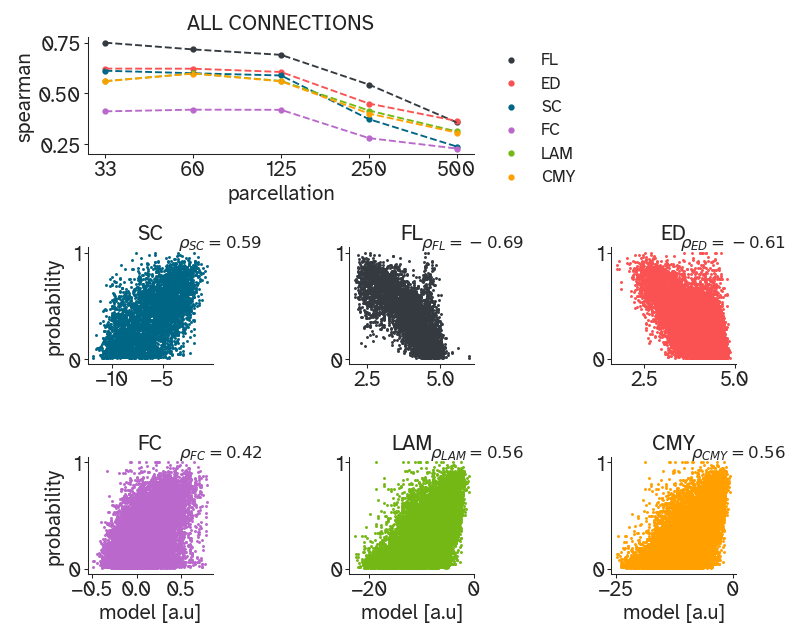

In [836]:
SC_color = DEEP_BLUE
FC_color = "#BA68CB"
CMY_color = "#FFA000"
LAM_color = "#74B816"
ED_color = "#FA5252"
FL_color= "#343A40"

fig, axes = plt.subplot_mosaic(
    [
        ["M","M","."],
        ["B","D","C"],
        ["G","F","E"]
    ],
    figsize=(14*CM,11*CM),
    dpi=150,
)
axes["M"].scatter(parcellations,abs(df_spearman['FL']),label="FL",color=FL_color, s=4)
axes["M"].plot(parcellations, abs(df_spearman['FL']),linestyle='dashed', linewidth=0.9,color=FL_color)

axes["M"].scatter(parcellations,abs(df_spearman['ED']),label="ED",color=ED_color, s=4)
axes["M"].plot(parcellations, abs(df_spearman['ED']),linestyle='dashed', linewidth=0.9,color=ED_color)

axes["M"].scatter(parcellations,df_spearman['SC'],label="SC",color=SC_color, s=4)
axes["M"].plot(parcellations, df_spearman['SC'],linestyle='dashed', linewidth=0.9,color=SC_color)

axes["M"].scatter(parcellations,df_spearman['FC'],label="FC",color=FC_color, s=4)
axes["M"].plot(parcellations, df_spearman['FC'],linestyle='dashed', linewidth=0.9,color=FC_color)

axes["M"].scatter(parcellations,df_spearman['LAM'],label="LAM",color=LAM_color, s=4)
axes["M"].plot(parcellations, df_spearman['LAM'],linestyle='dashed', linewidth=0.9,color=LAM_color)

axes["M"].scatter(parcellations,df_spearman['CMY'],label="CMY",color=CMY_color, s=4)
axes["M"].plot(parcellations, df_spearman['CMY'],linestyle='dashed', linewidth=0.9,color=CMY_color)

axes["M"].set_xlabel('parcellation')
axes["M"].set_ylabel('spearman')
axes["M"].set_title("ALL CONNECTIONS")

axes["M"].legend(loc="upper right", frameon=False, fontsize=8,bbox_to_anchor=(1.3, 1))

# SCATTER PLOT
sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_SC),y=vect_Allco_ftract_SCmask,ax=axes["B"],color= SC_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["B"].set_title("SC")

sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_ED),y=vect_Allco_ftract,ax=axes["C"],color= ED_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["C"].set_title("ED")

sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_FL),y=vect_Allco_ftract_FLmask,ax=axes["D"],color= FL_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["D"].set_title("FL")

sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_CMY),y=vect_Allco_ftract,ax=axes["E"],color= CMY_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["E"].set_title("CMY")

sns.scatterplot(x=yanat.utils.log_normalize(vect_Allco_LAM),y=vect_Allco_ftract,ax=axes["F"],color= LAM_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["F"].set_title("LAM")

sns.scatterplot(x=(vect_Allco_FC),y=vect_Allco_ftract,ax=axes["G"],color= FC_color,s=2,linewidth=0,edgecolor='black',rasterized=True)
axes["G"].set_title("FC")

for i in ["E","F","G"]:
    axes[i].set_xlabel('model [a.u]')
axes["B"].set_ylabel('probability')
axes["G"].set_ylabel('probability')

axes["B"].annotate(
    f"$\\rho_{{SC}} = {np.round(rho_Allco_SC, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
axes["C"].annotate(
    f"$\\rho_{{ED}} = {np.round(rho_Allco_ED, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
axes["D"].annotate(
    f"$\\rho_{{FL}} = {np.round(rho_Allco_FL, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
axes["E"].annotate(
    f"$\\rho_{{CMY}} = {np.round(rho_Allco_CMY, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
axes["F"].annotate(
    f"$\\rho_{{LAM}} = {np.round(rho_Allco_LAM, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
axes["G"].annotate(
    f"$\\rho_{{FC}} = {np.round(rho_Allco_FC, 2)}$", xy=(1.4, 1), fontsize=8, 
    xycoords="axes fraction", 
    ha='right')

sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/multiplot.png",dpi=600,bbox_inches='tight')

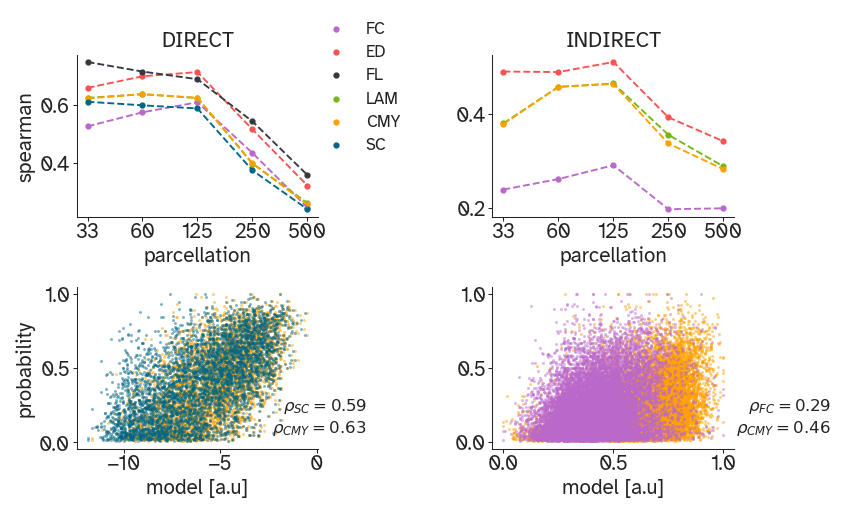

In [324]:
SC_color = DEEP_BLUE
FC_color = "#BA68CB"
CMY_color = "#FFA000"
LAM_color = "#74B816"
ED_color = "#FA5252"
FL_color= "#343A40"

fig, axes = plt.subplot_mosaic(
    [
        ["A","B"],
        ["C","D"]
    ],
    figsize=(15 * CM, 9 * CM),
    dpi=150,
)
# PERFORMANCE
#axes["A"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)
#axes["A"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)

axes["A"].scatter(parcellations,df_spearman_directco['FC'],label="FC",color=FC_color, s=4)
axes["A"].plot(parcellations, df_spearman_directco['FC'],linestyle='dashed', linewidth=0.9,color=FC_color)

axes["A"].scatter(parcellations,abs(df_spearman_directco['ED']),label="ED",color=ED_color, s=4)
axes["A"].plot(parcellations, abs(df_spearman_directco['ED']),linestyle='dashed', linewidth=0.9,color=ED_color)

axes["A"].scatter(parcellations,abs(df_spearman_directco['FL']),label="FL",color=FL_color, s=4)
axes["A"].plot(parcellations, abs(df_spearman_directco['FL']),linestyle='dashed', linewidth=0.9,color=FL_color)

axes["A"].scatter(parcellations,df_spearman_directco['LAM'],label="LAM",color=LAM_color, s=4)
axes["A"].plot(parcellations, df_spearman_directco['LAM'],linestyle='dashed', linewidth=0.9,color=LAM_color)

axes["A"].scatter(parcellations,df_spearman_directco['CMY'],label="CMY",color=CMY_color, s=4)
axes["A"].plot(parcellations, df_spearman_directco['CMY'],linestyle='dashed', linewidth=0.9,color=CMY_color)

axes["A"].scatter(parcellations,df_spearman_directco['SC'],label="SC",color=SC_color, s=4)
axes["A"].plot(parcellations, df_spearman_directco['SC'],linestyle='dashed', linewidth=0.9,color=SC_color)

axes["A"].legend(loc="upper right", frameon=False, fontsize=8,bbox_to_anchor=(1.4, 1.3))
axes["A"].set_title("DIRECT")

axes["B"].set_xlabel('parcellation')
axes["A"].set_ylabel('spearman')

#axes["B"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)
#axes["B"].axvline(x=2, color=HALF_BLACK, linestyle='dashed', linewidth=0.7)

axes["B"].scatter(parcellations,df_spearman_indirectco['FC'],label="FC",color=FC_color, s=4)
axes["B"].plot(parcellations, df_spearman_indirectco['FC'],linestyle='dashed', linewidth=0.9,color=FC_color)

axes["B"].scatter(parcellations,abs(df_spearman_indirectco['ED']),label="ED",color=ED_color, s=4)
axes["B"].plot(parcellations, abs(df_spearman_indirectco['ED']),linestyle='dashed', linewidth=0.9,color=ED_color)

axes["B"].scatter(parcellations,df_spearman_indirectco['LAM'],label="LAM",color=LAM_color, s=4)
axes["B"].plot(parcellations, df_spearman_indirectco['LAM'],linestyle='dashed', linewidth=0.9,color=LAM_color)

axes["B"].scatter(parcellations,df_spearman_indirectco['CMY'],label="CMY",color=CMY_color, s=4)
axes["B"].plot(parcellations, df_spearman_indirectco['CMY'],linestyle='dashed', linewidth=0.9,color=CMY_color)

axes["B"].set_xlabel('parcellation')
axes["B"].set_title("INDIRECT")
axes["A"].set_xlabel('parcellation')

# SCATTER PLOT
sns.scatterplot(x=yanat.utils.log_normalize(vect_model_cmy),y=vect_ftract,ax=axes["C"],color= CMY_color,alpha=0.5,s=2,linewidth=0,rasterized=True)
sns.scatterplot(x=yanat.utils.log_normalize(vect_model),y=vect_ftract,ax=axes["C"],color= SC_color,alpha=0.5,s=2,linewidth=0,rasterized=True)
axes["C"].set_xlabel('model [a.u]')
axes["C"].set_ylabel('probability')
axes["C"].annotate(f"$\\rho_{{SC}} = {np.round(rho_direct_SC, 2)}$\n$\\rho_{{CMY}} = {np.round(rho_direct_CMY, 2)}$", 
    xy=(1.2, 0.1), 
    fontsize=8, 
    xycoords="axes fraction", 
    ha='right')
sns.scatterplot(x=(logmimnmax_indirect_cmy),y=vect_ftract_indirect,ax=axes["D"],color= CMY_color, alpha=0.5,s=2,linewidth=0,rasterized=True)
sns.scatterplot(x=yanat.utils.minmax_normalize(vect_model_indirect_FC),y=vect_ftract_indirect,ax=axes["D"],color= FC_color,alpha=0.5,s=2,rasterized=True,linewidth=0)
axes["D"].set_xlabel('model [a.u]')
axes["D"].annotate(
    f"$\\rho_{{FC}} = {np.round(rho_indirect_FC, 2)}$\n$\\rho_{{CMY}} = {np.round(rho_indirect_CMY, 2)}$", 
    xy=(1.4, 0.1), 
    fontsize=8, 
    xycoords="axes fraction", 
    ha='right')

sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/multiplot.png",dpi=600,bbox_inches='tight')

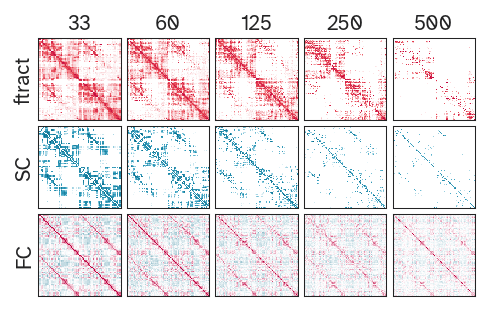

In [1313]:
from matplotlib.colors import LinearSegmentedColormap
SC_color = white_blue_mono
ftract_color = white_red_mono 
colors = [DEEP_BLUE, 'white' ,RED]
cmap_name = 'deep_blue_white_red'

# Créer la colormap personnalisée
FC_color = LinearSegmentedColormap.from_list(cmap_name, colors)

#sns.color_palette('light:r', as_cmap=True)

mosaic_ftract =  ["A","B","C","D","E"]
mosaic_structural_co = ["AA","BB","CC","DD","EE"]
mosaic_FL = ["F","G","H","I","J"]

fig, axes = plt.subplot_mosaic(
    [
        ["A","B","C","D","E"],
        ["AA","BB","CC","DD","EE"],
        ["F","G","H","I","J"]
    ],
    figsize=(8 * CM, 5 * CM),
    dpi=150,)

for axe in range(5):
    sns.heatmap(full_ftract[axe],
    ax=axes[mosaic_ftract[axe]],square=True,xticklabels=False,cmap=ftract_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )
    sns.heatmap(yanat.utils.log_minmax_normalize(full_SC[axe]),
    ax=axes[mosaic_structural_co[axe]],square=True,xticklabels=False,cmap=SC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,)
    
    sns.heatmap(full_FC[axe],
    ax=axes[mosaic_FL[axe]],square=True,xticklabels=False,cmap=FC_color,
    center=0,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,)

axes["A"].set_ylabel("ftract")
axes["AA"].set_ylabel("SC")
axes["F"].set_ylabel("FC")

axes["A"].title.set_text("33")
axes["B"].title.set_text("60")
axes["C"].title.set_text("125")
axes["D"].title.set_text("250")
axes["E"].title.set_text("500")
fig.tight_layout(pad=0.3)
sns.despine(fig=fig, top=False, right=False, left=False, bottom=False)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/heatmap_SMALLER.pdf",dpi=600,bbox_inches='tight')

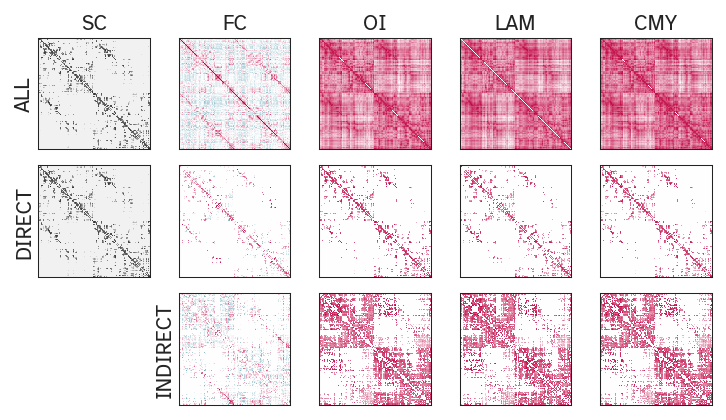

In [1311]:
from matplotlib.colors import LinearSegmentedColormap
SC_color = sns.color_palette('light:'+HALF_BLACK, as_cmap=True)

ftract_color = white_red_mono 
colors = [DEEP_BLUE, 'white' ,RED]
cmap_name = 'deep_blue_white_red'

# Créer la colormap personnalisée
FC_color = LinearSegmentedColormap.from_list(cmap_name, colors)

#sns.color_palette('light:r', as_cmap=True)

mosaic_ftract =  ["A","B","C","D","E"]
mosaic_structural_co = ["AA","BB","CC","DD","EE"]
mosaic_FL = ["F","G","H","I","J"]

fig, axes = plt.subplot_mosaic(
    [
        ["A","B","C","D","E"],
        ["AA","BB","CC","DD","EE"],
        [".","BBB","CCC","DDD","EEE"]
    ],
    figsize=(12 * CM,7* CM),
    dpi=150,)

sns.heatmap(yanat.utils.log_minmax_normalize(full_SC[2]),
    ax=axes["A"],square=True,xticklabels=False,cmap=SC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )
sns.heatmap(yanat.utils.log_minmax_normalize(full_SC[2]),
    ax=axes["AA"],square=True,xticklabels=False,cmap=SC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )

sns.heatmap((oi_norm_125),
    ax=axes["C"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(direct_oi_125),
    ax=axes["CC"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(indirectCMY),
    ax=axes["EEE"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
             center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(directCMY),
    ax=axes["EE"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
             center=0
    )
sns.heatmap((indirectLAM),
    ax=axes["DDD"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
             center=0
    )
sns.heatmap((directLAM),
    ax=axes["DD"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
             center=0
    )
sns.heatmap((AllcoCMY),
    ax=axes["E"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap((directFC),
    ax=axes["BB"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
             center=0
    )
sns.heatmap((full_FC[2]),
    ax=axes["B"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(lam,
    ax=axes["D"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(cmy,
    ax=axes["E"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )

sns.heatmap((indirectFC),
    ax=axes["BBB"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(indirectLAM),
    ax=axes["CCC"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(indirectCMY),
    ax=axes["DDD"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
sns.heatmap(yanat.utils.log_minmax_normalize(directLAM),
    ax=axes["DD"],square=True,xticklabels=False,cmap=FC_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
            center=0
    )
#sns.heatmap(yanat.utils.log_minmax_normalize(indirectftract),ax=axes["AAA"],square=True,xticklabels=False,
#            cmap=SC_color,
#            yticklabels=False,
#    linewidths=0,
#    rasterized=True,
#    cbar=False)

axes["A"].set_ylabel("ALL")
axes["AA"].set_ylabel("DIRECT")
axes["BBB"].set_ylabel("INDIRECT")

#axes["BBB"].set_xlabel("ftract")
axes["A"].title.set_text("SC")
axes["B"].title.set_text("FC")
axes["C"].title.set_text("OI")
axes["D"].title.set_text("LAM")
axes["E"].title.set_text("CMY")

fig.tight_layout(pad=0.3)
sns.despine(fig=fig, top=False, right=False, left=False, bottom=False)
plt.savefig(f"/home/kenza/Desktop/Data-fTRACT/figures/MASKED.pdf",dpi=600,bbox_inches='tight')

In [1207]:
scnorm = yanat.utils.spectral_normalization(1,full_SC[2])
lam=yanat.utils.log_minmax_normalize(yanat.core.lam(scnorm,0.56))
lam=yanat.utils.log_minmax_normalize(yanat.core.communicability(scnorm))


<Axes: >

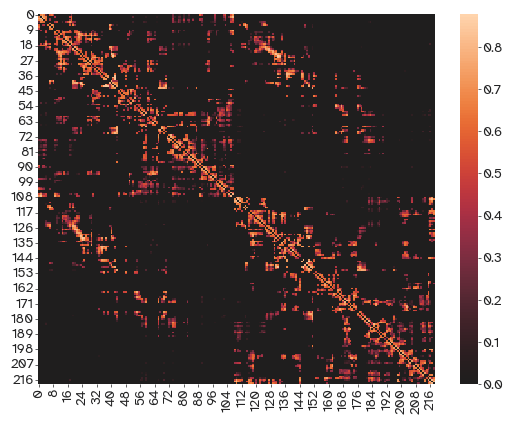

In [1256]:
sns.heatmap(yanat.utils.log_minmax_normalize(full_SC[2]),center=0)

<Axes: >

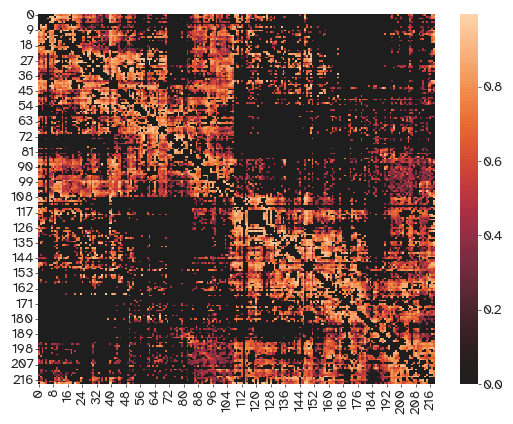

In [1257]:
sns.heatmap(yanat.utils.log_minmax_normalize(indirectftract),center=0)

In [1187]:
direct_oi_125 = pf.display_mask(oi_norm_125,directftract)[0]

In [1152]:
full_SC[2]

array([[0.        , 0.0147325 , 0.04147778, ..., 0.        , 0.        ,
        0.        ],
       [0.0147325 , 0.        , 0.07582928, ..., 0.        , 0.        ,
        0.        ],
       [0.04147778, 0.07582928, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.07206259,
        0.02215148],
       [0.        , 0.        , 0.        , ..., 0.07206259, 0.        ,
        0.08307847],
       [0.        , 0.        , 0.        , ..., 0.02215148, 0.08307847,
        0.        ]])

In [754]:
full_ftract=[]
for res in range(len(parcellations)):
    probability_path = "Lausanne2008-"+parcellations[res]+"/probability.txt"
    labels_path = "Lausanne2008-"+parcellations[res]+"/Lausanne2008-"+parcellations[res]+".txt"
    ftract = pf.reorder_matrix(matlabfile_path, probability_path, labels_path, res,0)
    full_ftract.append(ftract)

In [748]:
full_FC=[]
full_SC=[]
for i in range(5):
    FC = pf.read_functional_connectivity(matlabfile_path,i)
    full_FC.append(FC)
    SC = pf.read_structural_connectivity(matlabfile_path,i)
    full_SC.append(SC)

In [732]:
full_FC

[array([[ 1.        ,  0.36991771,  0.17229416, ...,  0.05692839,
          0.02820479,  0.06226046],
        [ 0.36991771,  1.        ,  0.02780723, ..., -0.00169829,
          0.01489304,  0.06405311],
        [ 0.17229416,  0.02780723,  1.        , ..., -0.10043568,
         -0.07184714, -0.18974749],
        ...,
        [ 0.05692839, -0.00169829, -0.10043568, ...,  1.        ,
          0.57370307,  0.64855051],
        [ 0.02820479,  0.01489304, -0.07184714, ...,  0.57370307,
          1.        ,  0.47719129],
        [ 0.06226046,  0.06405311, -0.18974749, ...,  0.64855051,
          0.47719129,  1.        ]]),
 array([[ 1.00000000e+00,  3.84016513e-01,  3.31945446e-01, ...,
          3.98869865e-02,  3.33276386e-02,  2.21874251e-01],
        [ 3.84016513e-01,  1.00000000e+00,  2.84130938e-01, ...,
          3.21785160e-04, -8.74755969e-02, -7.55367793e-02],
        [ 3.31945446e-01,  2.84130938e-01,  1.00000000e+00, ...,
          1.42335104e-02, -6.20968545e-02,  1.25330636e-

In [725]:
for i in range(5):
    print(Directco[i]['FC'][0])

[[0.         0.36991771 0.17229416 ... 0.         0.         0.        ]
 [0.36991771 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.57370307 0.64855051]
 [0.         0.         0.         ... 0.57370307 0.         0.47719129]
 [0.         0.         0.         ... 0.64855051 0.47719129 0.        ]]
[[0.         0.38401651 0.33194545 ... 0.         0.         0.        ]
 [0.38401651 0.         0.28413094 ... 0.         0.         0.        ]
 [0.33194545 0.28413094 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.5483769  0.        ]
 [0.         0.         0.         ... 0.5483769  0.         0.49310894]
 [0.         0.         0.         ... 0.         0.49310894 0.        ]]
[[0.         0.20321384 0.37441287 ... 0.         0.         0.        ]
 [0.20321384 0.         0.19804311 ... 

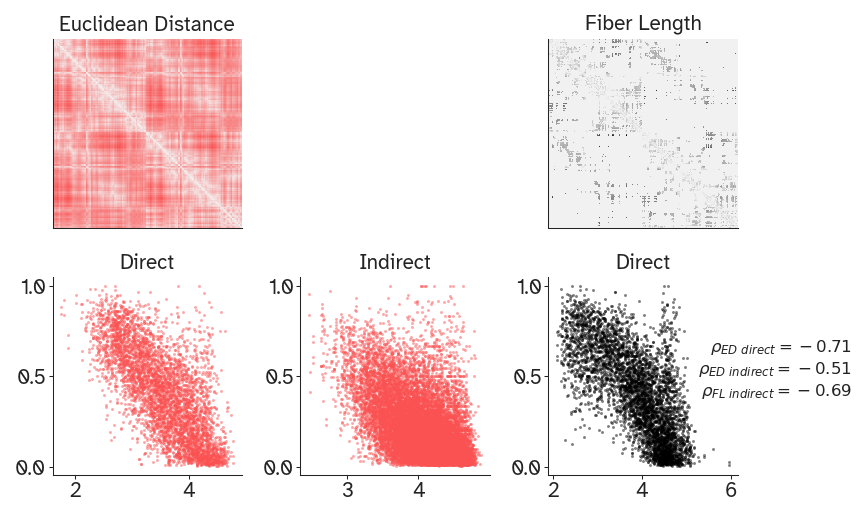

In [326]:
ED_color = sns.color_palette('light:#FA5252', as_cmap=True) 
fiber_color = sns.color_palette('light:black', as_cmap=True)
#white_red_mono 

coord = pf.read_coordinates(matlabfile_path, 2) 
ED = pf.calculate_euclidean_distances(coord)
fiber = pf.read_fiber_length(matlabfile_path, 2)

fig, axes = plt.subplot_mosaic(
    [
        ["A",".","B"],
        ["C","D","E"]
    ],
    figsize=(15 * CM, 9 * CM),
    dpi=150,
)
sns.heatmap(fiber,ax=axes["B"],square=True,xticklabels=False,cmap=fiber_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )
sns.heatmap(ED,ax=axes["A"],square=True,xticklabels=False,cmap=ED_color,
    yticklabels=False,
    linewidths=0,
    rasterized=True,
    cbar=False,
    )

sns.scatterplot(x=yanat.utils.log_normalize(vect_model_indirect_ED),y=vect_ftract_indirect,ax=axes["D"],color= "#FA5252",alpha=0.5,s=2,linewidth=0,rasterized=True)
sns.scatterplot(x=yanat.utils.log_normalize(vect_ED),y=vect_ftract,ax=axes["C"],color= "#FA5252",alpha=0.5,s=2,linewidth=0,rasterized=True)
sns.scatterplot(x=yanat.utils.log_normalize(vect_FL),y=vect_ftract,ax=axes["E"],color= "black",alpha=0.5,s=2,linewidth=0,rasterized=True)

axes["E"].annotate(
    f"$\\rho_{{ED\ direct}} = {np.round(rho_direct_ED, 2)}$\n$\\rho_{{ED\ indirect}} = {np.round(rho_indirect_ED, 2)}$\n$\\rho_{{FL\ indirect}} = {np.round(rho_direct_FL, 2)}$", 
    xy=(1.6, 0.4), 
    fontsize=8, 
    xycoords="axes fraction", 
    ha='right')

axes["B"].title.set_text("Fiber Length")
axes["A"].title.set_text("Euclidean Distance")
axes["C"].title.set_text("Direct")
axes["D"].title.set_text("Indirect")
axes["E"].title.set_text("Direct")

sns.despine(fig=fig, trim=False)
fig.tight_layout(pad=1)

In [327]:
structural_connectivity = pf.read_structural_connectivity(matlabfile_path,2)
structural_connectivity = yanat.utils.spectral_normalization(1,structural_connectivity)
structural_connectivity_res1 = pf.read_structural_connectivity(matlabfile_path,1)
structural_connectivity_res1 = yanat.utils.spectral_normalization(1,structural_connectivity_res1)
structural_connectivity_res0 = pf.read_structural_connectivity(matlabfile_path,0)
structural_connectivity_res0 = yanat.utils.spectral_normalization(1,structural_connectivity_res0)

In [328]:
default_parameters_res1 = yanat.utils.optimal_influence_default_values(structural_connectivity_res1)
oi_res1 = yanat.core.optimal_influence(structural_connectivity_res1.shape[0], game_kwargs=default_parameters_res1)

default_parameters_res0 = yanat.utils.optimal_influence_default_values(structural_connectivity_res0)
oi_res0 = yanat.core.optimal_influence(structural_connectivity.shape[0], game_kwargs=default_parameters_res0)

Doing Nodes:   0%|          | 0/114 [00:00<?, ?it/s]

/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning:

KeyboardInterrupt: 

# IV - Simulation

In [64]:
default_parameters = yanat.utils.optimal_influence_default_values(structural_connectivity)

In [66]:
oi = yanat.core.optimal_influence(structural_connectivity.shape[0], game_kwargs=default_parameters)

Doing Nodes:   0%|          | 0/219 [00:00<?, ?it/s]

/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  connectivity @ X[:, timepoint - 1] + input_matrix[:, timepoint - 1]
/home/kenza/anaconda3/lib/python3.11/site-packages/yanat/core.py:101: NumbaPerformanceWarning:

In [791]:
with open('OI_first_simu_125_res2.pkl', 'wb') as file:
    pickle.dump(oi, file)

In [792]:
np.shape(oi)

(219000, 219)

In [793]:
oi_125 = oi.groupby(level=0).std().fillna(0)
oi_norm_125 = yanat.utils.log_minmax_normalize(oi_125)


<Axes: >

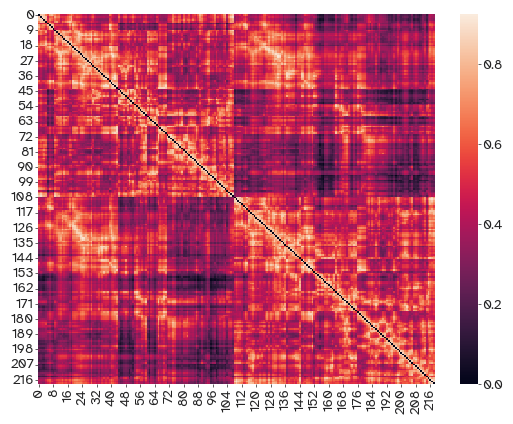

In [795]:
sns.heatmap(oi_norm_125)

In [789]:
all_co_oi_125

array([[0.        , 0.82476883, 0.85944173, ..., 0.        , 0.        ,
        0.        ],
       [0.82434931, 0.        , 0.88189168, ..., 0.        , 0.        ,
        0.        ],
       [0.85886392, 0.88180405, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.88242112,
        0.84095515],
       [0.        , 0.        , 0.        , ..., 0.88433557, 0.        ,
        0.88695567],
       [0.        , 0.        , 0.        , ..., 0.84324098, 0.88677311,
        0.        ]])

In [232]:
all_co_oi_125 = pf.display_mask(oi_norm_125,directftract)[0]

In [233]:
pf.calculate_spearmanr(all_co_oi_125,directftract)

(0.617431310842284, 0.0)

In [235]:
df_spearman_directco

,SC,FC,ED,FL,LAM,CMY
33,0.611466,0.526065,-0.659572,-0.749366,0.625109,0.622847
60,0.599128,0.574866,-0.699763,-0.716207,0.637609,0.638068
125,0.588192,0.609727,-0.714500,-0.689611,0.624296,0.625196
250,0.373446,0.433840,-0.515576,-0.543405,0.397136,0.397830
500,0.238771,0.244591,-0.320873,-0.357390,0.260311,0.255155


In [236]:
df_spearman

,SC,FC,ED,FL,LAM,CMY
33,0.611466,0.411863,-0.621907,-0.749366,0.560498,0.559661
60,0.599128,0.420007,-0.621530,-0.716207,0.597951,0.597778
125,0.588192,0.419320,-0.605432,-0.689611,0.561372,0.559437
250,0.373446,0.280262,-0.450065,-0.543405,0.415902,0.401145
500,0.238771,0.228908,-0.364569,-0.357390,0.312976,0.307243
